In [2]:
import pandas as pd 
import numpy as np 

In [3]:
user_interaction = pd.read_csv("user_interaction.csv")
metadata = pd.read_csv("metadata.csv")

In [4]:
user_interaction.info()
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   user_id       int64  
 1   pratilipi_id  int64  
 2   read_percent  float64
 3   updated_at    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 76.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954501 entries, 0 to 954500
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   author_id      954501 non-null  int64 
 1   pratilipi_id   954501 non-null  int64 
 2   category_name  954501 non-null  object
 3   reading_time   954501 non-null  int64 
 4   updated_at     954501 non-null  object
 5   published_at   954494 non-null  object
dtypes: int64(3), object(3)
memory usage: 43.7+ MB


In [5]:
user_interaction.head()

,user_id,pratilipi_id,read_percent,updated_at
0,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291
1,5506791971543560,1377786223038206,40.0,2022-03-19 13:49:25.660
2,5506791996468218,1377786227025240,100.0,2022-03-21 17:28:47.288
3,5506791978752866,1377786222398208,65.0,2022-03-21 07:39:25.183
4,5506791978962946,1377786228157051,100.0,2022-03-22 17:32:44.777


In [6]:
metadata.head()

,author_id,pratilipi_id,category_name,reading_time,updated_at,published_at
0,-3418949279741297,1025741862639304,translation,0,2020-08-19 15:26:13,2016-09-30 10:37:04
1,-2270332351871840,1377786215601277,translation,171,2021-01-21 16:27:07,2018-06-11 13:17:48
2,-2270332352037261,1377786215601962,translation,92,2020-09-29 12:33:57,2018-06-12 04:19:12
3,-2270332352521845,1377786215640994,translation,0,2019-10-17 09:03:37,2019-09-26 14:58:53
4,-2270332349665658,1377786215931338,translation,47,2020-05-05 11:33:41,2018-11-25 12:28:23


In [7]:
user_interaction.isnull().sum()

user_id         0
pratilipi_id    0
read_percent    0
updated_at      0
dtype: int64

In [8]:
metadata.isnull().sum()

author_id        0
pratilipi_id     0
category_name    0
reading_time     0
updated_at       0
published_at     7
dtype: int64

In [9]:
user_interaction.duplicated().sum()

0

In [10]:
metadata.duplicated().sum()

0

In [11]:
user_interaction["updated_at"] = pd.to_datetime(user_interaction["updated_at"])

In [12]:
metadata["updated_at"]= pd.to_datetime(metadata["updated_at"])

In [13]:
metadata["published_at"]= pd.to_datetime(metadata["published_at"])

In [14]:
user_interaction.dtypes

user_id                  int64
pratilipi_id             int64
read_percent           float64
updated_at      datetime64[ns]
dtype: object

In [15]:
metadata.dtypes

author_id                 int64
pratilipi_id              int64
category_name            object
reading_time              int64
updated_at       datetime64[ns]
published_at     datetime64[ns]
dtype: object

In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [17]:
user_read_counts = user_interaction.groupby("user_id")["pratilipi_id"].nunique()

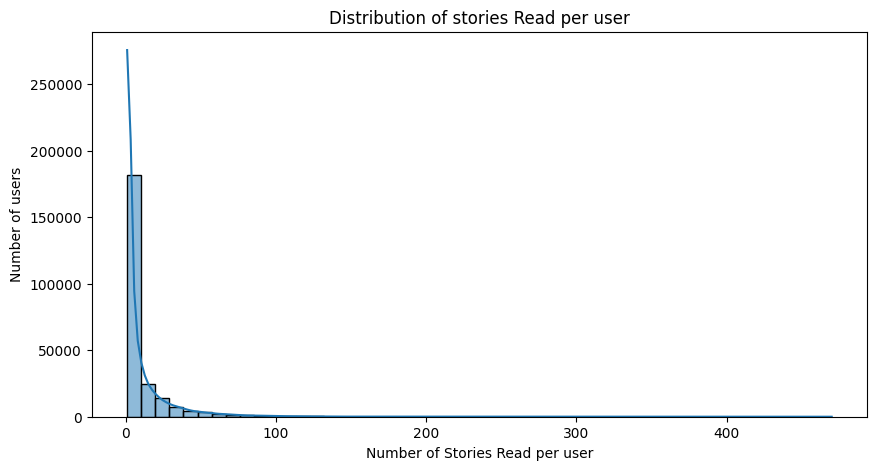

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(user_read_counts, bins=50, kde=True)
plt.xlabel("Number of Stories Read per user")
plt.ylabel("Number of users")
plt.title("Distribution of stories Read per user")
plt.show()

In [19]:
user_avg_read= user_interaction.groupby("user_id")["read_percent"].mean()
user_avg_read

user_id
3257552805995172     85.000000
3257621147984548     80.000000
3260243929637540    100.000000
3260275089121956     97.405405
3260433621754532    100.000000
                       ...    
5506791996685224     43.552190
5506791996685251    100.000000
5506791996685282    100.000000
5506791996685286    100.000000
5506791996685385     21.507437
Name: read_percent, Length: 243606, dtype: float64

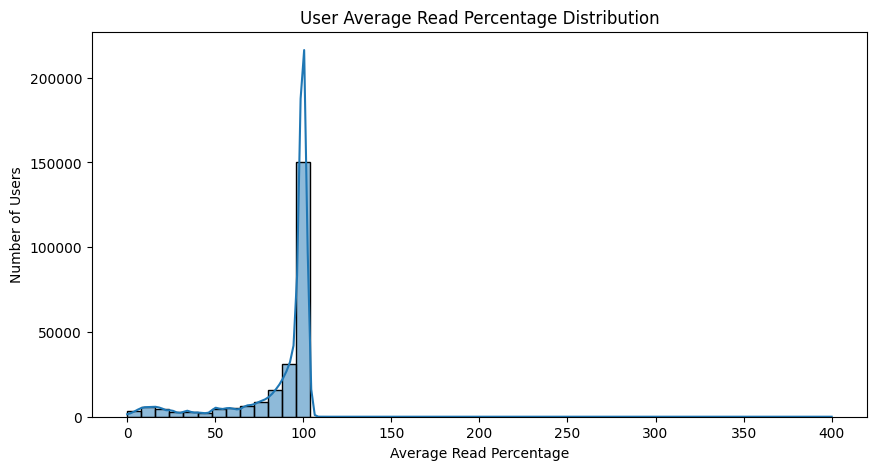

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(user_avg_read,bins=50,kde=True)
plt.xlabel("Average Read Percentage")
plt.ylabel("Number of Users")
plt.title("User Average Read Percentage Distribution")
plt.show()

In [21]:
top_Stories = user_interaction["pratilipi_id"].value_counts().head(10)
top_Stories

1377786228205426    3439
1377786217541698    2392
1377786228336060    2318
1377786228237359    2176
1377786228240538    2155
1377786228262109    1943
1377786228243389    1872
1377786215982409    1869
1377786228127102    1854
1377786228184482    1844
Name: pratilipi_id, dtype: int64

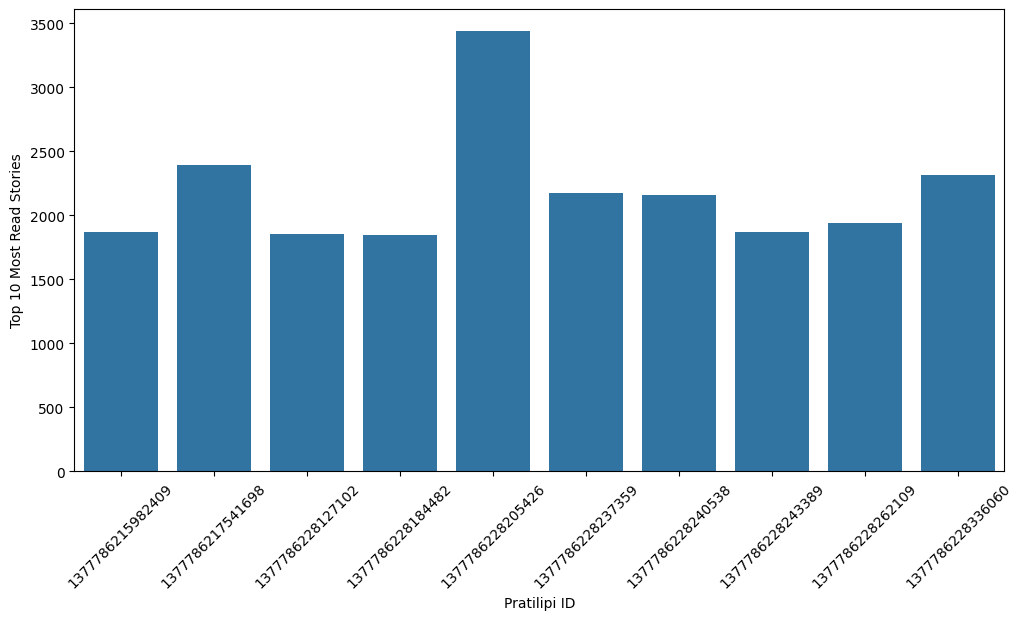

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_Stories.index, y=top_Stories.values)
plt.xlabel("Pratilipi ID")
plt.ylabel("Top 10 Most Read Stories")
plt.xticks(rotation=45)
plt.show()

In [23]:
top_categories = metadata["category_name"].value_counts().head(10)
top_categories

romance            193220
shortstories       102097
social              73920
suspense            64041
family              58515
novels              53584
life                51356
moral-inspiring     47421
women               37168
horror              28506
Name: category_name, dtype: int64

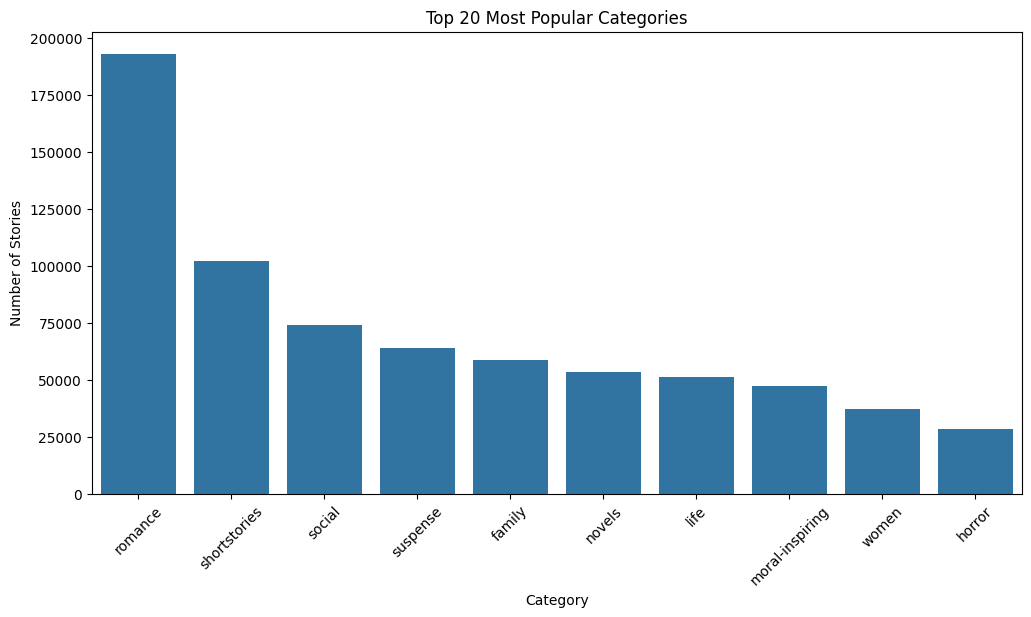

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_categories.index,y=top_categories.values)
plt.xlabel("Category")
plt.ylabel("Number of Stories")
plt.title("Top 20 Most Popular Categories")
plt.xticks(rotation=45)
plt.show()

In [25]:
merged_data = user_interaction.merge(metadata, on="pratilipi_id", how="left")
merged_data.head()

,user_id,pratilipi_id,read_percent,updated_at_x,author_id,category_name,reading_time,updated_at_y,published_at
0,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291,-2.270332e+15,novels,376.0,2022-03-15 18:39:52,2022-03-15 18:39:52
1,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291,-2.270332e+15,family,376.0,2022-03-15 18:39:52,2022-03-15 18:39:52
2,5506791961876448,1377786228262109,100.0,2022-03-22 10:29:57.291,-2.270332e+15,romance,376.0,2022-03-15 18:39:52,2022-03-15 18:39:52
3,5506791971543560,1377786223038206,40.0,2022-03-19 13:49:25.660,-2.270332e+15,romance,361.0,2021-03-17 11:48:11,2021-03-16 19:09:19
4,5506791971543560,1377786223038206,40.0,2022-03-19 13:49:25.660,-2.270332e+15,suspense,361.0,2021-03-17 11:48:11,2021-03-16 19:09:19


In [26]:
merged_data = merged_data.sort_values(by="updated_at_y")
split_idx = int(len(merged_data)*0.75)
train_data = merged_data.iloc[:split_idx]
test_data = merged_data.iloc[split_idx:]


In [27]:
train_data.shape

(3724965, 9)

In [28]:
test_data.shape

(1241656, 9)

### BUILDING THE RECOMMENDATION MODEL


In [29]:
from surprise import SVD 
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

In [30]:
reader = Reader(rating_scale=(0,100))

In [31]:
data = Dataset.load_from_df(train_data[['user_id','pratilipi_id','read_percent']],reader)

In [32]:
trainset, valset = train_test_split(data, test_size=0.25)

In [33]:
svd_model = SVD(n_factors=50, random_state=42)
svd_model.fit(trainset)

In [34]:
predictions = svd_model.test(valset)
rmse = accuracy.rmse(predictions)

RMSE: 22.0882


In [35]:
def get_recommendations(user_id,model,all_story_ids,n_recs=5):
    user_read_stories = train_data[train_data['user_id']==user_id]['pratilipi_id'].unique()
    unseen_stories = [story for story in all_story_ids if story not in user_read_stories]
    predictions = [model.predict(user_id, story) for story in unseen_stories]
    predictions.sort(key=lambda x: x.est, reverse=True )
    top_recs = [pred.iid for pred in predictions[:n_recs]]
    return top_recs
all_story_ids = train_data['pratilipi_id'].unique()
recommended_stories = get_recommendations(1,svd_model,all_story_ids)

In [36]:
print(f"Recommended Stories for User 1: {recommended_stories}")

Recommended Stories for User 1: [-44938742294840, 1377786215505130, 1377786215785902, 1377786215803170, 1377786215727917]


##### optimizing the model

In [37]:
from surprise.model_selection import RandomizedSearchCV
from surprise import SVD, Dataset, Reader

param_grid = {
    'n_factors': [50, 100],  
    'reg_all': [0.02, 0.1],  
    'lr_all': [0.005]  
}

random_search = RandomizedSearchCV(SVD, param_grid, n_iter=4, measures=['rmse'], cv=2, random_state=42, n_jobs=-1)
random_search.fit(data)

best_params = random_search.best_params['rmse']
print(f"Best Parameters: {best_params}")

best_svd = SVD(**best_params)
trainset = data.build_full_trainset()
best_svd.fit(trainset)


Best Parameters: {'n_factors': 100, 'reg_all': 0.02, 'lr_all': 0.005}


In [38]:
def get_recommendations(user_id, model, all_story_ids, n_recs=5):
    user_read_stories = train_data[train_data['user_id']==user_id]['pratilipi_id'].unique()
    unseen_stories = [story for story in all_story_ids if story not in user_read_stories]
    predictions = [model.predict(user_id, story) for story in unseen_stories ]
    predictions.sort(key=lambda x: x.est, reverse=True)

    top_recs = [pred.iid for pred in predictions[:n_recs]]
    return top_recs

In [39]:
all_story_ids = train_data['pratilipi_id'].unique()
user_id = 1
recommended_stories = get_recommendations(user_id, best_svd, all_story_ids)
print(f"Top 5 Recommended Stories for User {user_id}: {recommended_stories}")

Top 5 Recommended Stories for User 1: [1377786215776934, -44938742294840, 1377786215505130, 1377786215785902, 1377786215803170]


In [41]:
import pandas as pd

active_users = train_data['user_id'].value_counts()
active_users = active_users[active_users >= 5].index  

top_stories = train_data['pratilipi_id'].value_counts().head(1000).index

recommendations = []
for user in active_users[:5000]:  
    top_stories_for_user = get_recommendations(user, best_svd, top_stories, n_recs=5)
    recommendations.append([user] + top_stories_for_user)

recommendations_df = pd.DataFrame(recommendations, columns=['user_id', 'rec_1', 'rec_2', 'rec_3', 'rec_4', 'rec_5'])
recommendations_df.to_csv("recommendations.csv", index=False)

print("✅ Optimized recommendations saved to recommendations.csv")


✅ Optimized recommendations saved to recommendations.csv
